In [1]:
%cd ..

/home/chickencurry/emb-ml-challenge


In [2]:
import torch
from utils.tinyyolov2 import TinyYoloV2Pruned
from utils.dataloader import VOCDataLoaderPerson
from utils.yolo import filter_boxes, nms
from utils.viz import display_with_bboxes

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
import torch_directml
device = torch_directml.device()
print(device)

privateuseone:0


In [5]:
load_path1 = "./runs/voc_pretrained.pt"
net1 = TinyYoloV2Pruned(num_classes=20)
net1.load_state_dict(torch.load(load_path1), strict=False)
net1.eval()
net1.to(device)

load_path2 = "./runs/voc_person_only_new.pt"
net2 = TinyYoloV2Pruned(num_classes=1)
net2.load_state_dict(torch.load(load_path2), strict=False)
net2.eval()
net2.to(device)

TinyYoloV2Pruned(
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), s

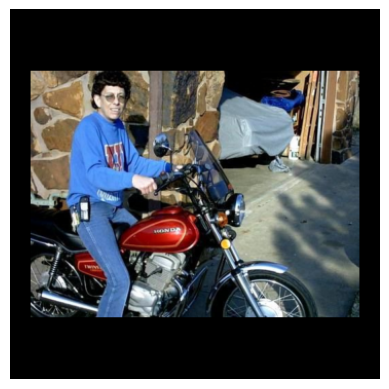

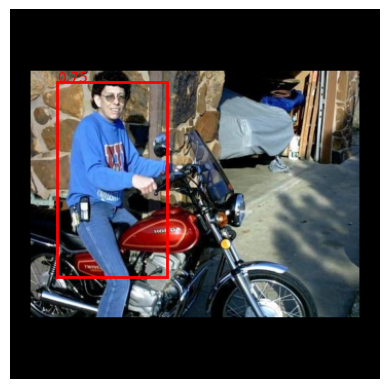

In [13]:
test_loader = VOCDataLoaderPerson(train=False, batch_size=1, shuffle=True)
(input, target) = next(iter(test_loader))
input = input.to(device)

output1 = net1(input, yolo=True)
output1 = filter_boxes(output1, 0.3)
output1 = nms(output1, 0.25)

output2 = net2(input, yolo=True)
output2 = filter_boxes(output2, 0.3)
output2 = nms(output2, 0.25)

display_with_bboxes(input.cpu(), output1, multiple_classes=True)
display_with_bboxes(input.cpu(), output2, multiple_classes=False)